In [48]:
import numpy as np

In [49]:

from sklearn.linear_model import LinearRegression
print("Scikit-learn is working!")


Scikit-learn is working!


In [50]:
import sklearn
print(sklearn.__version__)


1.6.1


In [51]:
from sklearn.linear_model import LinearRegression


Intercept: 30.00000000000003
Coefficient: 0.19999999999999996
Mean Absolute Error: 0.0
Mean Squared Error: 0.0


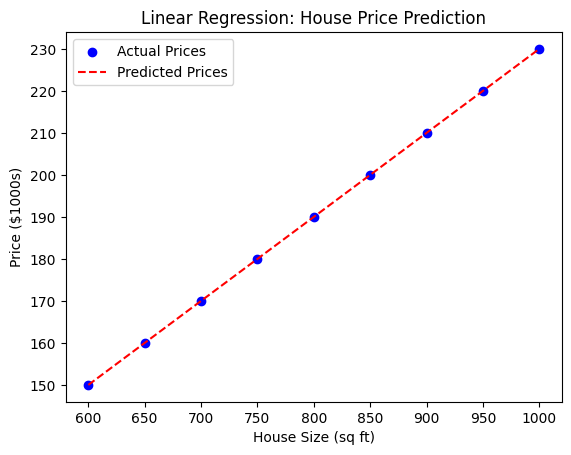

In [52]:

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

X = np.array([600, 650, 700, 750, 800, 850, 900, 950, 1000]).reshape(-1, 1)  
y = np.array([150, 160, 170, 180, 190, 200, 210, 220, 230])  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(f"Intercept: {model.intercept_}")
print(f"Coefficient: {model.coef_[0]}")

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
plt.scatter(X, y, color='blue', label="Actual Prices")
plt.plot(X, model.predict(X), color='red', linestyle="--", label="Predicted Prices")
plt.xlabel("House Size (sq ft)")
plt.ylabel("Price ($1000s)")
plt.title("Linear Regression: House Price Prediction")
plt.legend()
plt.show()


In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
df = pd.read_csv("netflix.csv")
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [54]:

print(df.columns)

X = df[['release_year', 'duration']]  
y = df['rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)


Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')
Training set size: (7045, 2)
Testing set size: (1762, 2)


In [55]:

X = df[['release_year', 'duration']] 
y = df['rating']  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)


Training set size: (7045, 2)
Testing set size: (1762, 2)


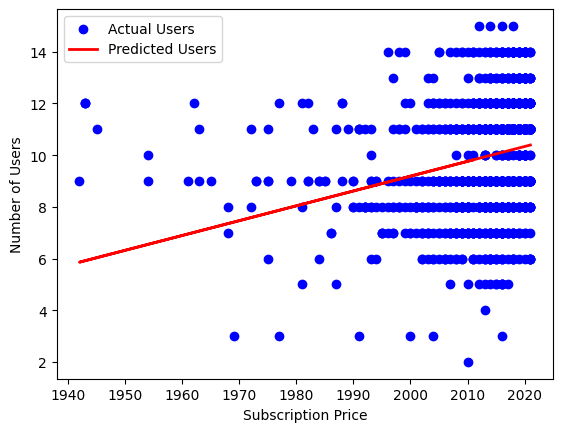

In [56]:
from sklearn.preprocessing import LabelEncoder
df_clean = df.dropna(subset=['release_year', 'rating'])

X_single = df_clean[['release_year']]
y_clean = df_clean['rating']

label_encoder = LabelEncoder()
y_clean_encoded = label_encoder.fit_transform(y_clean)

X_train, X_test, y_train, y_test = train_test_split(X_single, y_clean_encoded, test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)


y_pred = lr.predict(X_test)


plt.scatter(X_test, y_test, color='blue', label='Actual Users')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted Users')
plt.xlabel('Subscription Price')
plt.ylabel('Number of Users')
plt.legend()
plt.show()


In [57]:

lr_multi = LinearRegression()
lr_multi.fit(X_train, y_train)


y_pred_multi = lr_multi.predict(X_test)


print("Intercept:", lr_multi.intercept_)
print("Coefficients:", lr_multi.coef_)


Intercept: -105.60714794855382
Coefficients: [0.05739732]


In [58]:
# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred_multi)
print("Mean Squared Error:", mse)

# R-squared Score
r2 = r2_score(y_test, y_pred_multi)
print("R-squared Score:", r2)


Mean Squared Error: 3.418360500068805
R-squared Score: 0.04910850067985062


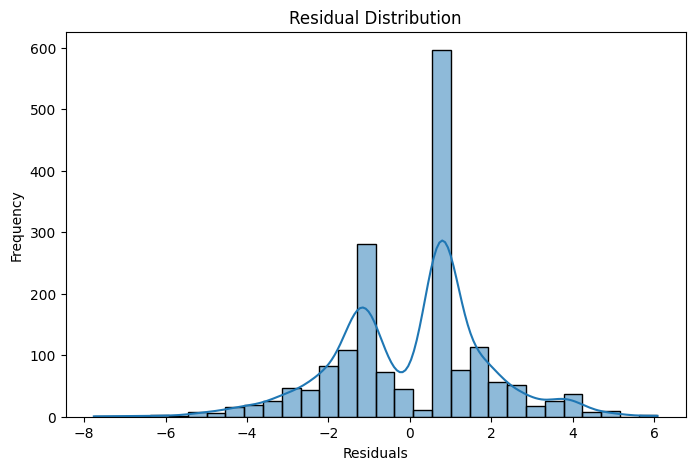

In [59]:
residuals = y_test - y_pred_multi

plt.figure(figsize=(8,5))
sns.histplot(residuals, bins=30, kde=True)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Residual Distribution")
plt.show()


In [60]:
from sklearn.linear_model import Ridge, Lasso

# Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
print("Ridge R² Score:", ridge.score(X_test, y_test))

# Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
print("Lasso R² Score:", lasso.score(X_test, y_test))


Ridge R² Score: 0.04910854775239215
Lasso R² Score: 0.04964695850097267


<>:4: SyntaxWarning: invalid escape sequence '\d'
<>:4: SyntaxWarning: invalid escape sequence '\d'
C:\Users\user7\AppData\Local\Temp\ipykernel_18788\1151292093.py:4: SyntaxWarning: invalid escape sequence '\d'
  df['duration_numeric'] = df['duration'].str.extract('(\d+)').astype(float)


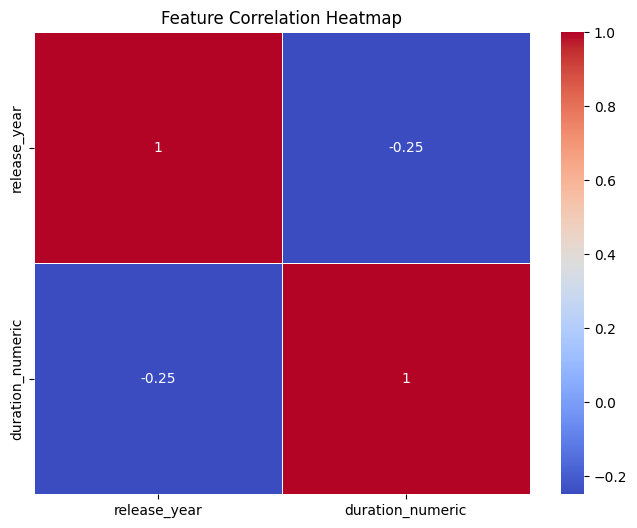

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

df['duration_numeric'] = df['duration'].str.extract('(\d+)').astype(float)

plt.figure(figsize=(8,6))
sns.heatmap(df[['release_year', 'duration_numeric']].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()
